In [1]:
import math
import xarray as xr
import cartopy.crs as ccrs
import matplotlib as mpl
from matplotlib import pyplot as plt 
import matplotlib.pylab as plt
import matplotlib.path as mpath
from matplotlib.pyplot import figure
import numpy as np
import cartopy.feature as cfeature
import pyproj
import utm
import pandas as pd 
import traceback 
from pathlib import Path  
import os  
import numpy.ma as ma
import netCDF4 as nc
import glob
import datetime as dt
from netCDF4 import date2num,num2date
#from scipy.ndimage import gaussian_filter

C:\Users\Anna\anaconda3\lib\site-packages\xarray\backends\cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


In [2]:

ds_26 = xr.open_mfdataset('/Users/Anna/Desktop/MSMET/Thesis/WRFprepData/March2018HYCOM/020_archv.2018_085_*_3z.nc', combine = 'by_coords', concat_dim = 'time')
ds_26.to_netcdf('test_26.nc')
ds26 = xr.open_dataset('test_26.nc')

C:\Users\Anna\anaconda3\lib\site-packages\xarray\backends\plugins.py:61: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [4]:
#test domain
#latbounds = [26.5, 27]
#lonbounds = [-91, -90.5]

#real domain 
latbounds = [24.5, 29]
lonbounds = [-93, -87.5]

lats = ds26.Latitude.values[:]
lons = ds26.Longitude.values[:]

#set upper & lower bounds
latli = np.argmin(np.abs(lats-latbounds[0]))
latui = np.argmin(np.abs(lats-latbounds[1]))
lonli = np.argmin(np.abs(lons-lonbounds[0]))
lonui = np.argmin(np.abs(lons-lonbounds[1]))

v_subset_26=ds26.variables['v'][:,0,latli:latui, lonli:lonui]

lat_array=ds26.Latitude.values[latli:latui]
lon_array=ds26.Longitude.values[lonli:lonui]

meanV_26 = v_subset_26.mean('MT')


In [5]:
#March 26 Dopplerscat
#ds26_1 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180326_084656_0001-0110_line01.L2.nc')
ds26_2 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180326_084656_0118-0170_line02.L2.nc')
ds26_3 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180326_084656_0180-0227_line03.L2.nc')
ds26_4 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180326_084656_0238-0296_line04.L2.nc')
ds26_5 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180326_084656_0306-0348_line05.L2.nc')
ds26_6 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180326_084656_0360-0375_line06.L2.nc')
ds26_7 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180326_084656_0377-0419_line07.L2.nc')
ds26_8 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180326_084656_0429-0470_line08.L2.nc')
ds26_9 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180326_084656_0485-0533_line09.L2.nc')
ds26_10 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180326_084656_0543-0581_line10.L2.nc')
#ds26_11=xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/JPL_March22/20180326_084656_0588-0682_line11.L2.nc')

In [6]:

#lat26_1=ds26_1.latitude.values
#lon26_1=ds26_1.longitude.values
#flag26_1=ds26_1.flag.values
#v_cur26_1=ds26_1.v_current.values

lat26_2=ds26_2.latitude.values
lon26_2=ds26_2.longitude.values
flag26_2=ds26_2.flag.values
v_cur26_2=ds26_2.v_current.values

lat26_3=ds26_3.latitude.values
lon26_3=ds26_3.longitude.values
flag26_3=ds26_3.flag.values
v_cur26_3=ds26_3.v_current.values

lat26_4=ds26_4.latitude.values
lon26_4=ds26_4.longitude.values
flag26_4=ds26_4.flag.values
v_cur26_4=ds26_4.v_current.values

lat26_5=ds26_5.latitude.values
lon26_5=ds26_5.longitude.values
flag26_5=ds26_5.flag.values
v_cur26_5=ds26_5.v_current.values

lat26_6=ds26_6.latitude.values
lon26_6=ds26_6.longitude.values
flag26_6=ds26_6.flag.values
v_cur26_6=ds26_6.v_current.values

lat26_7=ds26_7.latitude.values
lon26_7=ds26_7.longitude.values
flag26_7=ds26_7.flag.values
v_cur26_7=ds26_7.v_current.values

lat26_8=ds26_8.latitude.values
lon26_8=ds26_8.longitude.values
flag26_8=ds26_8.flag.values
v_cur26_8=ds26_8.v_current.values

lat26_9=ds26_9.latitude.values
lon26_9=ds26_9.longitude.values
flag26_9=ds26_9.flag.values
v_cur26_9=ds26_9.v_current.values

lat26_10=ds26_10.latitude.values
lon26_10=ds26_10.longitude.values
flag26_10=ds26_10.flag.values
v_cur26_10=ds26_10.v_current.values

#lat26_11=ds26_11.latitude.values
#lon26_11=ds26_11.longitude.values
#flag26_11=ds26_11.flag.values
#v_cur26_11=ds26_11.v_current.values

In [7]:
#Apply Error Flag 
#0 is good, 2 is bad
#set flag to only accept 0

#lonlen26_1=len(lon26_1) #236
#latlen26_1=len(lat26_1) #954
#goodVarr26_1=np.zeros((latlen26_1,lonlen26_1))
#goodVarr26_1[:]=np.nan
#for x in range (len(lon26_1)):
#    for y in range (len(lat26_1)):
#        if flag26_1[y,x] == 0:
#            goodVarr26_1[y,x] = v_cur26_1[y,x] 
           
lonlen26_2=len(lon26_2)
latlen26_2=len(lat26_2)
goodVarr26_2=np.zeros((latlen26_2,lonlen26_2))
goodVarr26_2[:]=np.nan
for x in range (len(lon26_2)):
    for y in range (len(lat26_2)):
        if flag26_2[y,x] == 0:
            goodVarr26_2[y,x] = v_cur26_2[y,x] 

lonlen26_3=len(lon26_3)
latlen26_3=len(lat26_3)
goodVarr26_3=np.zeros((latlen26_3,lonlen26_3))
goodVarr26_3[:]=np.nan
for x in range (len(lon26_3)):
    for y in range (len(lat26_3)):
        if flag26_3[y,x] == 0:
            goodVarr26_3[y,x] = v_cur26_3[y,x] 

lonlen26_4=len(lon26_4)
latlen26_4=len(lat26_4)
goodVarr26_4=np.zeros((latlen26_4,lonlen26_4))
goodVarr26_4[:]=np.nan
for x in range (len(lon26_4)):
    for y in range (len(lat26_4)):
        if flag26_4[y,x] == 0:
            goodVarr26_4[y,x] = v_cur26_4[y,x] 
            
lonlen26_5=len(lon26_5)
latlen26_5=len(lat26_5)
goodVarr26_5=np.zeros((latlen26_5,lonlen26_5))
goodVarr26_5[:]=np.nan
for x in range (len(lon26_5)):
    for y in range (len(lat26_5)):
        if flag26_5[y,x] == 0:
            goodVarr26_5[y,x] = v_cur26_5[y,x] 

lonlen26_6=len(lon26_6)
latlen26_6=len(lat26_6)
goodVarr26_6=np.zeros((latlen26_6,lonlen26_6))
goodVarr26_6[:]=np.nan
for x in range (len(lon26_6)):
    for y in range (len(lat26_6)):
        if flag26_6[y,x] == 0:
            goodVarr26_6[y,x] = v_cur26_6[y,x] 
            
lonlen26_7=len(lon26_7)
latlen26_7=len(lat26_7)
goodVarr26_7=np.zeros((latlen26_7,lonlen26_7))
goodVarr26_7[:]=np.nan
for x in range (len(lon26_7)):
    for y in range (len(lat26_7)):
        if flag26_7[y,x] == 0:
            goodVarr26_7[y,x] = v_cur26_7[y,x] 
            
lonlen26_8=len(lon26_8)
latlen26_8=len(lat26_8)
goodVarr26_8=np.zeros((latlen26_8, lonlen26_8))
goodVarr26_8[:]=np.nan
for x in range (len(lon26_8)):
    for y in range (len(lat26_8)):
        if flag26_8[y,x] == 0:
            goodVarr26_8[y,x] = v_cur26_8[y,x] 

lonlen26_9=len(lon26_9)
latlen26_9=len(lat26_9)
goodVarr26_9=np.zeros((latlen26_9, lonlen26_9))
goodVarr26_9[:]=np.nan
for x in range (len(lon26_9)):
    for y in range (len(lat26_9)):
        if flag26_9[y,x] == 0:
            goodVarr26_9[y,x] = v_cur26_9[y,x] 
            
lonlen26_10=len(lon26_10)
latlen26_10=len(lat26_10)
goodVarr26_10=np.zeros((latlen26_10, lonlen26_10))
goodVarr26_10[:]=np.nan
for x in range (len(lon26_10)):
    for y in range (len(lat26_10)):
        if flag26_10[y,x] == 0:
            goodVarr26_10[y,x] = v_cur26_10[y,x] 
            
#lonlen26_11=len(lon26_11)
#latlen26_11=len(lat26_11)
#goodVarr26_11=np.zeros((latlen26_11, lonlen26_11))
#goodVarr26_11[:]=np.nan
#for x in range (len(lon26_11)):
#    for y in range (len(lat26_11)):
#        if flag26_11[y,x] == 0:
#            goodVarr26_11[y,x] = v_cur26_11[y,x] 


In [8]:
#Gaussian Filter V26
#HYCOM: lat_array (Y), lon_array (X), meanU_25
#DS: goodUarr25_1-10, lat25_1, lon25_1s

HYCOM_lat = lat_array
HYCOM_lon = lon_array

#Define new grid: 1km (1000m)
#match WRF refernce lat/lon, increment by partial degree 
###### !!!!! wrf lat lon NEED TO UPDATE THESE !!!!! ######

#REAL CASE: 
#lat_0 =  24.5
#lon_0 = -93
#lat_max = 28.75
#lon_max = -87.5

#TEST CASE: DS Domain
lat_0 =  26.45
lon_0 = -90.9
lat_max = 27.15
lon_max = -89.65 

#TEST CASE mini
#lat_0 =  26.75
#lon_0 = -90
#lat_max = 27
#lon_max = -89.75 

#min, max, then increment and fill lat & then lon (Y=lat, X=lon)
#0.008 degrees = 1km 
WRF_lat = np.arange(lat_0, lat_max, 0.00898315)
WRF_lon = np.arange(lon_0, lon_max, 0.00898315)
WRF_latLen = len(WRF_lat)
WRF_lonLen = len(WRF_lon)

#make current arrays (u & v) that match lat & lon dimensions, fill with nans 
#u25_WRF  = np.zeros((WRF_latLen, WRF_lonLen))   #(813, 688)
#v25_WRF = np.zeros((WRF_latLen, WRF_lonLen))  
#u25_WRF[:] = -999
#v25_WRF[:] = -999
#u26_WRF  = np.zeros((WRF_latLen, WRF_lonLen))   #(813, 688)
v26_WRF = np.zeros((WRF_latLen, WRF_lonLen))  
#u26_WRF[:] = -999
v26_WRF[:] = -999
#sst25_WRF  = np.zeros((WRF_latLen, WRF_lonLen))   #(813, 688)
#sst26_WRF = np.zeros((WRF_latLen, WRF_lonLen))  
#sst25_WRF[:] = -999
#sst26_WRF[:] = -999
DS_weightedV26 = v26_WRF*0
HYCOM_weightedV26= v26_WRF*0

#at equator, 1deg = 111.31949077920639km, so 1km*(1deg/111.31949077920639km) = 0.00898315
#Great Circle Calculator 
#http://edwilliams.org/gccalc.htm

#DS sigma??? = 0.03 # 0.015*2   
km_per_deg= 1/0.00898315
sigma_HYCOM = 0.02 # 0.015*2 #For HYCOM 
sigma_HYCOM_km = sigma_HYCOM*km_per_deg
sigma_DS = 0.75 #0.5-1.0 
sigma_DS_km = sigma_DS*km_per_deg


for y in range (0, WRF_latLen):  
    #print(' y :', y)
    for x in range (0, WRF_lonLen):
        #print('x:', x)
        sum_weight_HYCOM = 0
        sum_product_v26HYCOM = 0
        #sum_weight_DS26v1 = 0
        #sum_product_v26DS1 = 0
        sum_weight_DS26v2 = 0
        sum_product_v26DS2 = 0
        sum_weight_DS26v3 = 0
        sum_product_v26DS3 = 0
        sum_weight_DS26v4 = 0
        sum_product_v26DS4 = 0
        sum_weight_DS26v5 = 0
        sum_product_v26DS5 = 0
        sum_weight_DS26v6 = 0
        sum_product_v26DS6 = 0
        sum_weight_DS26v7 = 0
        sum_product_v26DS7 = 0
        sum_weight_DS26v8 = 0
        sum_product_v26DS8 = 0
        sum_weight_DS26v9 = 0
        sum_product_v26DS9 = 0
        sum_weight_DS26v10 = 0
        sum_product_v26DS10 = 0
        #sum_weight_DS26v11 = 0
        #sum_product_v26DS11 = 0
       
        #define area of weighting (lat,lon point +- 3 sigma in lat/lon but round up)
        #+- half size 
        #set bounds in lat/lon
        min_lon = max(WRF_lon[x] - 3*sigma_HYCOM, WRF_lon[0])
        max_lon = min(WRF_lon[x] + 3*sigma_HYCOM, WRF_lon[WRF_lonLen -1])
        min_lat = max(WRF_lat[y] - 3*sigma_HYCOM, WRF_lat[0])   
        max_lat = min(WRF_lat[y] + 3*sigma_HYCOM, WRF_lat[WRF_latLen -1])   

        good_lon = [] 
        good_lat = []
        inter_like = []
        
        #HYCOM lat/lon comparison 
        test1_In = np.where(HYCOM_lon >= min_lon)
        test2_In = np.where(HYCOM_lon <= max_lon)
        inter_like_lon = np.intersect1d(test1_In, test2_In)
        
        test1_In = np.where(HYCOM_lat >= min_lat)
        test2_In = np.where(HYCOM_lat <= max_lat)
        inter_like_lat = np.intersect1d(test1_In, test2_In)   
        
        #DS lat/lon comparison
        #DS26v1_test1_In = np.where(lon26_1 >= min_lon)
        #DS26v1_test2_In = np.where(lon26_1 <= max_lon)
        #DS26v1_inter_like_lon = np.intersect1d(DS26v1_test1_In, DS26v1_test2_In)
        #DS26v1_test1_In = np.where(lat26_1 >= min_lat)
        #DS26v1_test2_In = np.where(lat26_1 <= max_lat)
        #DS26v1_inter_like_lat = np.intersect1d(DS26v1_test1_In, DS26v1_test2_In)         
        
        DS26v2_test1_In = np.where(lon26_2 >= min_lon)
        DS26v2_test2_In = np.where(lon26_2 <= max_lon)
        DS26v2_inter_like_lon = np.intersect1d(DS26v2_test1_In, DS26v2_test2_In)
        DS26v2_test1_In = np.where(lat26_2 >= min_lat)
        DS26v2_test2_In = np.where(lat26_2 <= max_lat)
        DS26v2_inter_like_lat = np.intersect1d(DS26v2_test1_In, DS26v2_test2_In) 
        
        DS26v3_test1_In = np.where(lon26_3 >= min_lon)
        DS26v3_test2_In = np.where(lon26_3 <= max_lon)
        DS26v3_inter_like_lon = np.intersect1d(DS26v3_test1_In, DS26v3_test2_In)
        DS26v3_test1_In = np.where(lat26_3 >= min_lat)
        DS26v3_test2_In = np.where(lat26_3 <= max_lat)
        DS26v3_inter_like_lat = np.intersect1d(DS26v3_test1_In, DS26v3_test2_In) 
        
        DS26v4_test1_In = np.where(lon26_4 >= min_lon)
        DS26v4_test2_In = np.where(lon26_4 <= max_lon)
        DS26v4_inter_like_lon = np.intersect1d(DS26v4_test1_In, DS26v4_test2_In)
        DS26v4_test1_In = np.where(lat26_4 >= min_lat)
        DS26v4_test2_In = np.where(lat26_4 <= max_lat)
        DS26v4_inter_like_lat = np.intersect1d(DS26v4_test1_In, DS26v4_test2_In)         
        
        DS26v5_test1_In = np.where(lon26_5 >= min_lon)
        DS26v5_test2_In = np.where(lon26_5 <= max_lon)
        DS26v5_inter_like_lon = np.intersect1d(DS26v5_test1_In, DS26v5_test2_In)
        DS26v5_test1_In = np.where(lat26_5 >= min_lat)
        DS26v5_test2_In = np.where(lat26_5 <= max_lat)
        DS26v5_inter_like_lat = np.intersect1d(DS26v5_test1_In, DS26v5_test2_In) 
        
        DS26v6_test1_In = np.where(lon26_6 >= min_lon)
        DS26v6_test2_In = np.where(lon26_6 <= max_lon)
        DS26v6_inter_like_lon = np.intersect1d(DS26v6_test1_In, DS26v6_test2_In)
        DS26v6_test1_In = np.where(lat26_6 >= min_lat)
        DS26v6_test2_In = np.where(lat26_6 <= max_lat)
        DS26v6_inter_like_lat = np.intersect1d(DS26v6_test1_In, DS26v6_test2_In) 

        DS26v7_test1_In = np.where(lon26_7 >= min_lon)
        DS26v7_test2_In = np.where(lon26_7 <= max_lon)
        DS26v7_inter_like_lon = np.intersect1d(DS26v7_test1_In, DS26v7_test2_In)
        DS26v7_test1_In = np.where(lat26_7 >= min_lat)
        DS26v7_test2_In = np.where(lat26_7 <= max_lat)
        DS26v7_inter_like_lat = np.intersect1d(DS26v7_test1_In, DS26v7_test2_In)
    
        DS26v8_test1_In = np.where(lon26_8 >= min_lon)
        DS26v8_test2_In = np.where(lon26_8 <= max_lon)
        DS26v8_inter_like_lon = np.intersect1d(DS26v8_test1_In, DS26v8_test2_In)
        DS26v8_test1_In = np.where(lat26_8 >= min_lat)
        DS26v8_test2_In = np.where(lat26_8 <= max_lat)
        DS26v8_inter_like_lat = np.intersect1d(DS26v8_test1_In, DS26v8_test2_In) 
        
        DS26v9_test1_In = np.where(lon26_9 >= min_lon)
        DS26v9_test2_In = np.where(lon26_9 <= max_lon)
        DS26v9_inter_like_lon = np.intersect1d(DS26v9_test1_In, DS26v9_test2_In)
        DS26v9_test1_In = np.where(lat26_9 >= min_lat)
        DS26v9_test2_In = np.where(lat26_9 <= max_lat)
        DS26v9_inter_like_lat = np.intersect1d(DS26v9_test1_In, DS26v9_test2_In) 
        
        DS26v10_test1_In = np.where(lon26_10 >= min_lon)
        DS26v10_test2_In = np.where(lon26_10 <= max_lon)
        DS26v10_inter_like_lon = np.intersect1d(DS26v10_test1_In, DS26v10_test2_In)
        DS26v10_test1_In = np.where(lat26_10 >= min_lat)
        DS26v10_test2_In = np.where(lat26_10 <= max_lat)
        DS26v10_inter_like_lat = np.intersect1d(DS26v10_test1_In, DS26v10_test2_In) 
        
        #DS26v11_test1_In = np.where(lon26_11 >= min_lon)
        #DS26v11_test2_In = np.where(lon26_11 <= max_lon)
        #DS26v11_inter_like_lon = np.intersect1d(DS26v11_test1_In, DS26v11_test2_In)
        #DS26v11_test1_In = np.where(lat26_11 >= min_lat)
        #DS26v11_test2_In = np.where(lat26_11 <= max_lat)
        #DS26v11_inter_like_lat = np.intersect1d(DS26v11_test1_In, DS26v11_test2_In) 
        #np.where((HYCOM_lon >= min_lon) and (HYCOM_lon <= max_lon), HYCOM_lon)
        #np.where((HYCOM_lat >= min_lat) and (HYCOM_lat <= max_lat))
        
        #HYCOM index
        lon_indices = inter_like_lon
        lat_indices = inter_like_lat
        
        #DS index
        #DS26v1_lon_indices =  DS26v1_inter_like_lon
        #DS26v1_lat_indices =  DS26v1_inter_like_lat
        DS26v2_lon_indices =  DS26v2_inter_like_lon
        DS26v2_lat_indices =  DS26v2_inter_like_lat
        DS26v3_lon_indices =  DS26v3_inter_like_lon
        DS26v3_lat_indices =  DS26v3_inter_like_lat
        DS26v4_lon_indices =  DS26v4_inter_like_lon
        DS26v4_lat_indices =  DS26v4_inter_like_lat        
        DS26v5_lon_indices =  DS26v5_inter_like_lon
        DS26v5_lat_indices =  DS26v5_inter_like_lat
        DS26v6_lon_indices =  DS26v6_inter_like_lon
        DS26v6_lat_indices =  DS26v6_inter_like_lat
        DS26v7_lon_indices =  DS26v7_inter_like_lon
        DS26v7_lat_indices =  DS26v7_inter_like_lat
        DS26v8_lon_indices =  DS26v8_inter_like_lon
        DS26v8_lat_indices =  DS26v8_inter_like_lat
        DS26v9_lon_indices =  DS26v9_inter_like_lon
        DS26v9_lat_indices =  DS26v9_inter_like_lat 
        DS26v10_lon_indices =  DS26v10_inter_like_lon
        DS26v10_lat_indices =  DS26v10_inter_like_lat  
        #DS26v11_lon_indices =  DS26v11_inter_like_lon
        #DS26v11_lat_indices =  DS26v11_inter_like_lat  
        #lon_indices = np.logical_and(HYCOM_lon >= min_lon, HYCOM_lon <= max_lon)  
        #lat_indices = np.logical_and(HYCOM_lat >= min_lat, HYCOM_lat <= max_lat)
        
        #Good HYCOM index
        good_lon = HYCOM_lon[lon_indices]
        good_lat = HYCOM_lat[lat_indices]    
        
        #Good DS index
        #DS26v1_good_lon = lon26_1[DS26v1_lon_indices]
        #DS26v1_good_lat = lat26_1[DS26v1_lat_indices] 
        DS26v2_good_lon = lon26_2[DS26v2_lon_indices]
        DS26v2_good_lat = lat26_2[DS26v2_lat_indices] 
        DS26v3_good_lon = lon26_3[DS26v3_lon_indices]
        DS26v3_good_lat = lat26_3[DS26v3_lat_indices] 
        DS26v4_good_lon = lon26_4[DS26v4_lon_indices]
        DS26v4_good_lat = lat26_4[DS26v4_lat_indices] 
        DS26v5_good_lon = lon26_5[DS26v5_lon_indices]
        DS26v5_good_lat = lat26_5[DS26v5_lat_indices] 
        DS26v6_good_lon = lon26_6[DS26v6_lon_indices]
        DS26v6_good_lat = lat26_6[DS26v6_lat_indices] 
        DS26v7_good_lon = lon26_7[DS26v7_lon_indices]
        DS26v7_good_lat = lat26_7[DS26v7_lat_indices] 
        DS26v8_good_lon = lon26_8[DS26v8_lon_indices]
        DS26v8_good_lat = lat26_8[DS26v8_lat_indices]
        DS26v9_good_lon = lon26_9[DS26v9_lon_indices]
        DS26v9_good_lat = lat26_9[DS26v9_lat_indices] 
        DS26v10_good_lon = lon26_10[DS26v10_lon_indices]
        DS26v10_good_lat = lat26_10[DS26v10_lat_indices]
        #DS26v11_good_lon = lon26_11[DS26v11_lon_indices]
        #DS26v11_good_lat = lat26_11[DS26v11_lat_indices]    
        #get lengths of good arrays HYCOM 
        good_lon_len = len(good_lon)
        good_lat_len = len(good_lat)
        
        #DS length of food arrays 
        #DS26v1_good_lon_len = len(DS26v1_good_lon)
        #DS26v1_good_lat_len = len(DS26v1_good_lat) 
        DS26v2_good_lon_len = len(DS26v2_good_lon)
        DS26v2_good_lat_len = len(DS26v2_good_lat) 
        DS26v3_good_lon_len = len(DS26v3_good_lon)
        DS26v3_good_lat_len = len(DS26v3_good_lat) 
        DS26v4_good_lon_len = len(DS26v4_good_lon)
        DS26v4_good_lat_len = len(DS26v4_good_lat) 
        DS26v5_good_lon_len = len(DS26v5_good_lon)
        DS26v5_good_lat_len = len(DS26v5_good_lat) 
        DS26v6_good_lon_len = len(DS26v6_good_lon)
        DS26v6_good_lat_len = len(DS26v6_good_lat)  
        DS26v7_good_lon_len = len(DS26v7_good_lon)
        DS26v7_good_lat_len = len(DS26v7_good_lat) 
        DS26v8_good_lon_len = len(DS26v8_good_lon)
        DS26v8_good_lat_len = len(DS26v8_good_lat) 
        DS26v9_good_lon_len = len(DS26v9_good_lon)
        DS26v9_good_lat_len = len(DS26v9_good_lat) 
        DS26v10_good_lon_len = len(DS26v10_good_lon)
        DS26v10_good_lat_len = len(DS26v10_good_lat)      
        #DS26v11_good_lon_len = len(DS26v11_good_lon)
        #DS26v11_good_lat_len = len(DS26v11_good_lat)  
        
        #loop through values of good HYCOM arrays 
        for y_small in range(0, good_lat_len):
            for x_small in range(0, good_lon_len):         
                
                #calcualte the distance, 1km  
                #HYCOM distance 
                distance=(km_per_deg)*np.sqrt((good_lat[y_small]-WRF_lat[y])**2+((good_lon[x_small]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                #print('distance: ', distance)
                #print('3sigma', 3*sigma_HYCOM)
                #print(y, x, y_small, x_small, distance, good_lat[y_small], WRF_lat[y], good_lon[x_small], WRF_lon[x])
                
                #determine weights- get an array of poitns of the smaller domain
                if distance <= 3 * sigma_HYCOM_km: 
                    weight_HYCOM = 0.2*(1 / (sigma_HYCOM_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_HYCOM_km**2))
                else: 
                    weight_HYCOM = 0 
                    
                #sum wieghts for HYCOM u & v
                sum_weight_HYCOM = sum_weight_HYCOM + weight_HYCOM
                #print('sum_weight_HYCOM: ', sum_weight_HYCOM)

                #if sum of weights != 0, sum product of weights* current value for HYCOM                         
                sum_product_v26HYCOM = sum_product_v26HYCOM + weight_HYCOM * meanV_26[lat_indices[y_small], lon_indices[x_small]]
                HYCOM_weightedV26[y,x] =  sum_product_v26HYCOM/sum_weight_HYCOM
                
        #loop through values of good DS arrays 
        #for y_small_DS26v1 in range(0, DS26v1_good_lat_len):
        #    for x_small_DS26v1 in range(0, DS26v1_good_lon_len):         
        #        distance=(km_per_deg)*np.sqrt((DS26v1_good_lat[y_small_DS26v1]-WRF_lat[y])**2+((DS26v1_good_lon[x_small_DS26v1]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
        #        if distance <= 3 * sigma_DS_km and not np.isnan(goodVarr26_1[DS26v1_lat_indices[y_small_DS26v1], DS26v1_lon_indices[x_small_DS26v1]]): 
        #            weight_DS26v1 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
        #            sum_weight_DS26v1 = sum_weight_DS26v1 + weight_DS26v1
        #            sum_product_v26DS1 = sum_product_v26DS1 + weight_DS26v1 * goodVarr26_1[DS26v1_lat_indices[y_small_DS26v1], DS26v1_lon_indices[x_small_DS26v1]]
        #        else: 
        #            weight_DS26v1 = 0
        
        
        for y_small_DS26v2 in range(0, DS26v2_good_lat_len):
            for x_small_DS26v2 in range(0, DS26v2_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS26v2_good_lat[y_small_DS26v2]-WRF_lat[y])**2+((DS26v2_good_lon[x_small_DS26v2]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                if distance <= 3 * sigma_DS_km and not np.isnan(goodVarr26_2[DS26v2_lat_indices[y_small_DS26v2], DS26v2_lon_indices[x_small_DS26v2]]): 
                    weight_DS26v2 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS26v2 = sum_weight_DS26v2 + weight_DS26v2
                    sum_product_v26DS2 = sum_product_v26DS2 + weight_DS26v2 * goodVarr26_2[DS26v2_lat_indices[y_small_DS26v2], DS26v2_lon_indices[x_small_DS26v2]]
                else: 
                    weight_DS26v2 = 0
        
        for y_small_DS26v3 in range(0, DS26v3_good_lat_len):
            for x_small_DS26v3 in range(0, DS26v3_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS26v3_good_lat[y_small_DS26v3]-WRF_lat[y])**2+((DS26v3_good_lon[x_small_DS26v3]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                if distance <= 3 * sigma_DS_km and not np.isnan(goodVarr26_3[DS26v3_lat_indices[y_small_DS26v3], DS26v3_lon_indices[x_small_DS26v3]]): 
                    weight_DS26v3 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS26v3 = sum_weight_DS26v3 + weight_DS26v3
                    sum_product_v26DS3 = sum_product_v26DS3 + weight_DS26v3 * goodVarr26_3[DS26v3_lat_indices[y_small_DS26v3], DS26v3_lon_indices[x_small_DS26v3]]
                else: 
                    weight_DS26v3 = 0 
                    
        for y_small_DS26v4 in range(0, DS26v4_good_lat_len):
            for x_small_DS26v4 in range(0, DS26v4_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS26v4_good_lat[y_small_DS26v4]-WRF_lat[y])**2+((DS26v4_good_lon[x_small_DS26v4]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                if distance <= 3 * sigma_DS_km and not np.isnan(goodVarr26_4[DS26v4_lat_indices[y_small_DS26v4], DS26v4_lon_indices[x_small_DS26v4]]): 
                    weight_DS26v4 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS26v4 = sum_weight_DS26v4 + weight_DS26v4
                    sum_product_v26DS4 = sum_product_v26DS4 + weight_DS26v4 * goodVarr26_4[DS26v4_lat_indices[y_small_DS26v4], DS26v4_lon_indices[x_small_DS26v4]]
                else: 
                    weight_DS26v4 = 0 
                    
        for y_small_DS26v5 in range(0, DS26v5_good_lat_len):
            for x_small_DS26v5 in range(0, DS26v5_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS26v5_good_lat[y_small_DS26v5]-WRF_lat[y])**2+((DS26v5_good_lon[x_small_DS26v5]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                if distance <= 3 * sigma_DS_km and not np.isnan(goodVarr26_5[DS26v5_lat_indices[y_small_DS26v5], DS26v5_lon_indices[x_small_DS26v5]]): 
                    weight_DS26v5 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS26v5 = sum_weight_DS26v5 + weight_DS26v5
                    sum_product_v26DS5 = sum_product_v26DS5 + weight_DS26v5 * goodVarr26_5[DS26v5_lat_indices[y_small_DS26v5], DS26v5_lon_indices[x_small_DS26v5]]
                else: 
                    weight_DS26v5 = 0 
                    
        for y_small_DS26v6 in range(0, DS26v6_good_lat_len):
            for x_small_DS26v6 in range(0, DS26v6_good_lon_len):          
                distance=(km_per_deg)*np.sqrt((DS26v6_good_lat[y_small_DS26v6]-WRF_lat[y])**2+((DS26v6_good_lon[x_small_DS26v6]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                if distance <= 3 * sigma_DS_km and not np.isnan(goodVarr26_6[DS26v6_lat_indices[y_small_DS26v6], DS26v6_lon_indices[x_small_DS26v6]]): 
                    weight_DS26v6 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS26v6 = sum_weight_DS26v6 + weight_DS26v6
                    sum_product_v26DS6 = sum_product_v26DS6 + weight_DS26v6 * goodVarr26_6[DS26v6_lat_indices[y_small_DS26v6], DS26v6_lon_indices[x_small_DS26v6]]
                else: 
                    weight_DS26v6 = 0 
                    
        for y_small_DS26v7 in range(0, DS26v7_good_lat_len):
            for x_small_DS26v7 in range(0, DS26v7_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS26v7_good_lat[y_small_DS26v7]-WRF_lat[y])**2+((DS26v7_good_lon[x_small_DS26v7]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                if distance <= 3 * sigma_DS_km and not np.isnan(goodVarr26_7[DS26v7_lat_indices[y_small_DS26v7], DS26v7_lon_indices[x_small_DS26v7]]): 
                    weight_DS26v7 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS26v7 = sum_weight_DS26v7 + weight_DS26v7
                    sum_product_v26DS7 = sum_product_v26DS7 + weight_DS26v7 * goodVarr26_7[DS26v7_lat_indices[y_small_DS26v7], DS26v7_lon_indices[x_small_DS26v7]]
                else: 
                    weight_DS26v7 = 0 
                    
        for y_small_DS26v8 in range(0, DS26v8_good_lat_len):
            for x_small_DS26v8 in range(0, DS26v8_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS26v8_good_lat[y_small_DS26v8]-WRF_lat[y])**2+((DS26v8_good_lon[x_small_DS26v8]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                #determine weights - get an array of poitns of the smaller domain
                if distance <= 3 * sigma_DS_km and not np.isnan(goodVarr26_8[DS26v8_lat_indices[y_small_DS26v8], DS26v8_lon_indices[x_small_DS26v8]]): 
                    weight_DS26v8 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS26v8 = sum_weight_DS26v8 + weight_DS26v8
                    sum_product_v26DS8 = sum_product_v26DS8 + weight_DS26v8 * goodVarr26_8[DS26v8_lat_indices[y_small_DS26v8], DS26v8_lon_indices[x_small_DS26v8]]
                else: 
                    weight_DS26v8 = 0 
                    
        for y_small_DS26v9 in range(0, DS26v9_good_lat_len):
            for x_small_DS26v9 in range(0, DS26v9_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS26v9_good_lat[y_small_DS26v9]-WRF_lat[y])**2+((DS26v9_good_lon[x_small_DS26v9]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                #determine weights - get an array of poitns of the smaller domain
                if distance <= 3 * sigma_DS_km and not np.isnan(goodVarr26_9[DS26v9_lat_indices[y_small_DS26v9], DS26v9_lon_indices[x_small_DS26v9]]): 
                    weight_DS26v9 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS26v9 = sum_weight_DS26v9 + weight_DS26v9
                    sum_product_v26DS9 = sum_product_v26DS9 + weight_DS26v9 * goodVarr26_9[DS26v9_lat_indices[y_small_DS26v9], DS26v9_lon_indices[x_small_DS26v9]]
                else: 
                    weight_DS26v9 = 0 
                    
        for y_small_DS26v10 in range(0, DS26v10_good_lat_len):
            for x_small_DS26v10 in range(0, DS26v10_good_lon_len):         
                distance=(km_per_deg)*np.sqrt((DS26v10_good_lat[y_small_DS26v10]-WRF_lat[y])**2+((DS26v10_good_lon[x_small_DS26v10]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                #determine weights - get an array of poitns of the smaller domain
                if distance <= 3 * sigma_DS_km and not np.isnan(goodVarr26_10[DS26v10_lat_indices[y_small_DS26v10], DS26v10_lon_indices[x_small_DS26v10]]): 
                    weight_DS26v10 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
                    sum_weight_DS26v10 = sum_weight_DS26v10 + weight_DS26v10
                    sum_product_v26DS10 = sum_product_v26DS10 + weight_DS26v10 * goodVarr26_10[DS26v10_lat_indices[y_small_DS26v10], DS26v10_lon_indices[x_small_DS26v10]]
                else: 
                    weight_DS26v10 = 0 
                    
        #for y_small_DS26v11 in range(0, DS26v11_good_lat_len):
        #    for x_small_DS26v11 in range(0, DS26v11_good_lon_len):         
        #        distance=(km_per_deg)*np.sqrt((DS26v11_good_lat[y_small_DS26v11]-WRF_lat[y])**2+((DS26v11_good_lon[x_small_DS26v11]-WRF_lon[x])*np.cos(WRF_lat[y]*(np.pi/180.0)))**2)
                #determine weights - get an array of poitns of the smaller domain
        #        if distance <= 3 * sigma_DS_km and not np.isnan(goodVarr26_11[DS26v11_lat_indices[y_small_DS26v11], DS26v11_lon_indices[x_small_DS26v11]]): 
        #            weight_DS26v11 = (1 / (sigma_DS_km * np.sqrt(2 * np.pi))) * np.exp(-(distance**2) / (2*sigma_DS_km**2))
        #            sum_weight_DS26v11 = sum_weight_DS26v11 + weight_DS26v11
        #            sum_product_v26DS11 = sum_product_v26DS11 + weight_DS26v11 * goodVarr26_11[DS26v11_lat_indices[y_small_DS26v11], DS26v11_lon_indices[x_small_DS26v11]]
        #        else: 
        #            weight_DS26v11 = 0 
                    
    #outside of loop: sum of products/sum of weights
        DS_weight = (sum_weight_DS26v2 + sum_weight_DS26v2 + sum_weight_DS26v3 + sum_weight_DS26v4 + sum_weight_DS26v5 + sum_weight_DS26v6 + sum_weight_DS26v7 + sum_weight_DS26v8 + sum_weight_DS26v9 + sum_weight_DS26v10) #add each DS sum, add ech sum weigth     
        if DS_weight != 0: 
            DS_weightedV26[y,x] =  (sum_product_v26DS2 + sum_product_v26DS3 + sum_product_v26DS4 + sum_product_v26DS5 + sum_product_v26DS6 + sum_product_v26DS7 + sum_product_v26DS8 + sum_product_v26DS9 + sum_product_v26DS10)/(sum_weight_DS26v2 + sum_weight_DS26v2 + sum_weight_DS26v3 + sum_weight_DS26v4 + sum_weight_DS26v5 + sum_weight_DS26v6 + sum_weight_DS26v7 + sum_weight_DS26v8 + sum_weight_DS26v9 + sum_weight_DS26v10 ) #add each DS sum, add ech sum weigth 
        else: 
            DS_weightedV26[y,x] = -999
            
        v26_WRF[y,x] = (sum_product_v26DS1 + sum_product_v26DS2 + sum_product_v26DS3 + sum_product_v26DS4 + sum_product_v26DS5 + sum_product_v26DS6 + sum_product_v26DS7 + sum_product_v26DS8 + sum_product_v26DS9 + sum_product_v26DS10)/(+ sum_weight_DS26v1 + sum_weight_DS26v2 + sum_weight_DS26v2 + sum_weight_DS26v3 + sum_weight_DS26v4 + sum_weight_DS26v5 + sum_weight_DS26v6 + sum_weight_DS26v7 + sum_weight_DS26v8 + sum_weight_DS26v9 + sum_weight_DS26v10 ) #add each DS sum, add ech sum weigth 


In [12]:
print(v26_WRF.shape)
print(v26_WRF)
print(DS_weightedV26.shape)
print(HYCOM_weightedV26.shape)
print(DS_weightedV26)
print(HYCOM_weightedV26)

for x in v26_WRF: 
    for y in x: 
        if np.isnan(y):
            print('NaN present')
            
for x in v26_WRF: 
    for y in x: 
        if y == -999:
            print('-999 present')  

(73, 167)
[[0.56012591 0.56139526 0.56308975 ... 0.15760767 0.15397593 0.15177924]
 [0.56062757 0.56213955 0.56387593 ... 0.15802956 0.15459283 0.15252994]
 [0.56163997 0.56297621 0.56475969 ... 0.15944926 0.15586065 0.1533794 ]
 ...
 [0.7992812  0.7945731  0.78832427 ... 0.45187725 0.4160273  0.24708208]
 [0.79790033 0.79312923 0.78679731 ... 0.4609715  0.44034816 0.24764728]
 [0.79730765 0.7923306  0.78595314 ... 0.46752942 0.40563581 0.24816348]]
(73, 167)
(73, 167)
[[-9.99000000e+02 -9.99000000e+02 -9.99000000e+02 ... -9.99000000e+02
  -9.99000000e+02 -9.99000000e+02]
 [-9.99000000e+02 -9.99000000e+02 -9.99000000e+02 ... -9.99000000e+02
  -9.99000000e+02 -9.99000000e+02]
 [-9.99000000e+02 -9.99000000e+02 -9.99000000e+02 ... -9.99000000e+02
  -9.99000000e+02 -9.99000000e+02]
 ...
 [-9.99000000e+02 -9.99000000e+02 -9.99000000e+02 ...  4.63601549e-01
   4.74304208e-01 -9.99000000e+02]
 [-9.99000000e+02 -9.99000000e+02 -9.99000000e+02 ...  4.73066061e-01
   5.21092064e-01 -9.99000000e+

C:\Users\Anna\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


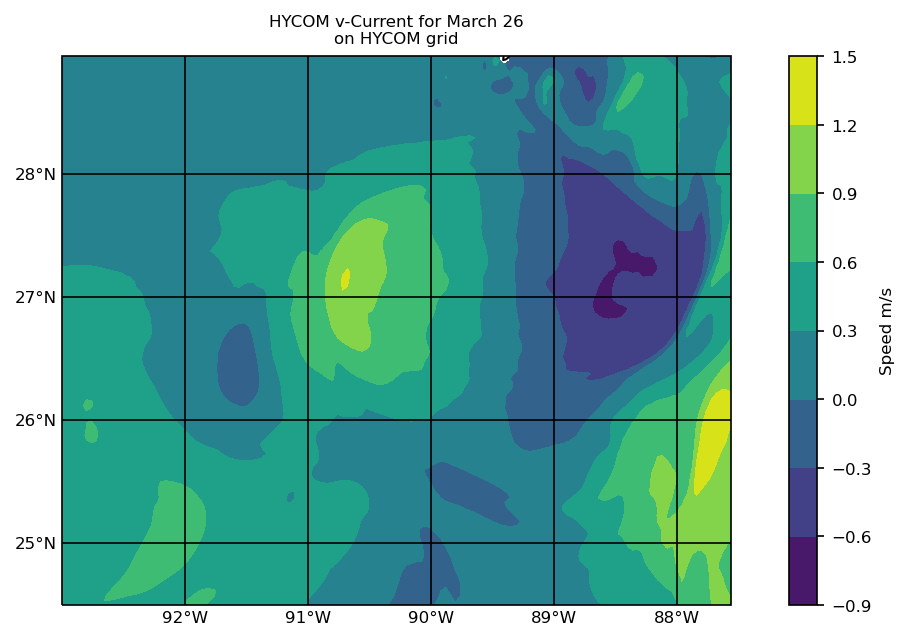

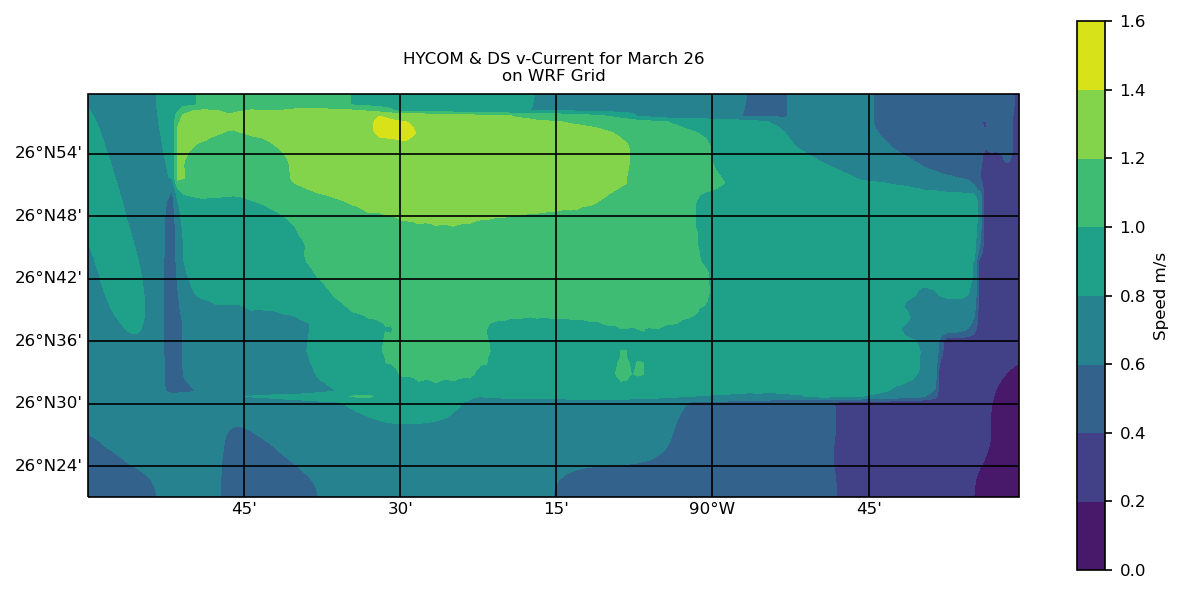

In [13]:

#U26
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(lon_array, lat_array, meanV_26)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, label = 'Speed m/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('HYCOM v-Current for March 26\non HYCOM grid')
plt.show()

#V26 smooth
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(WRF_lon, WRF_lat, v26_WRF)
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, label = 'Speed m/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('HYCOM & DS v-Current for March 26\non WRF Grid')
#save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
#plt.savefig(save_results_to + '26V_Weighted.png', bbox_inches = 'tight',dpi = 150)
plt.show()

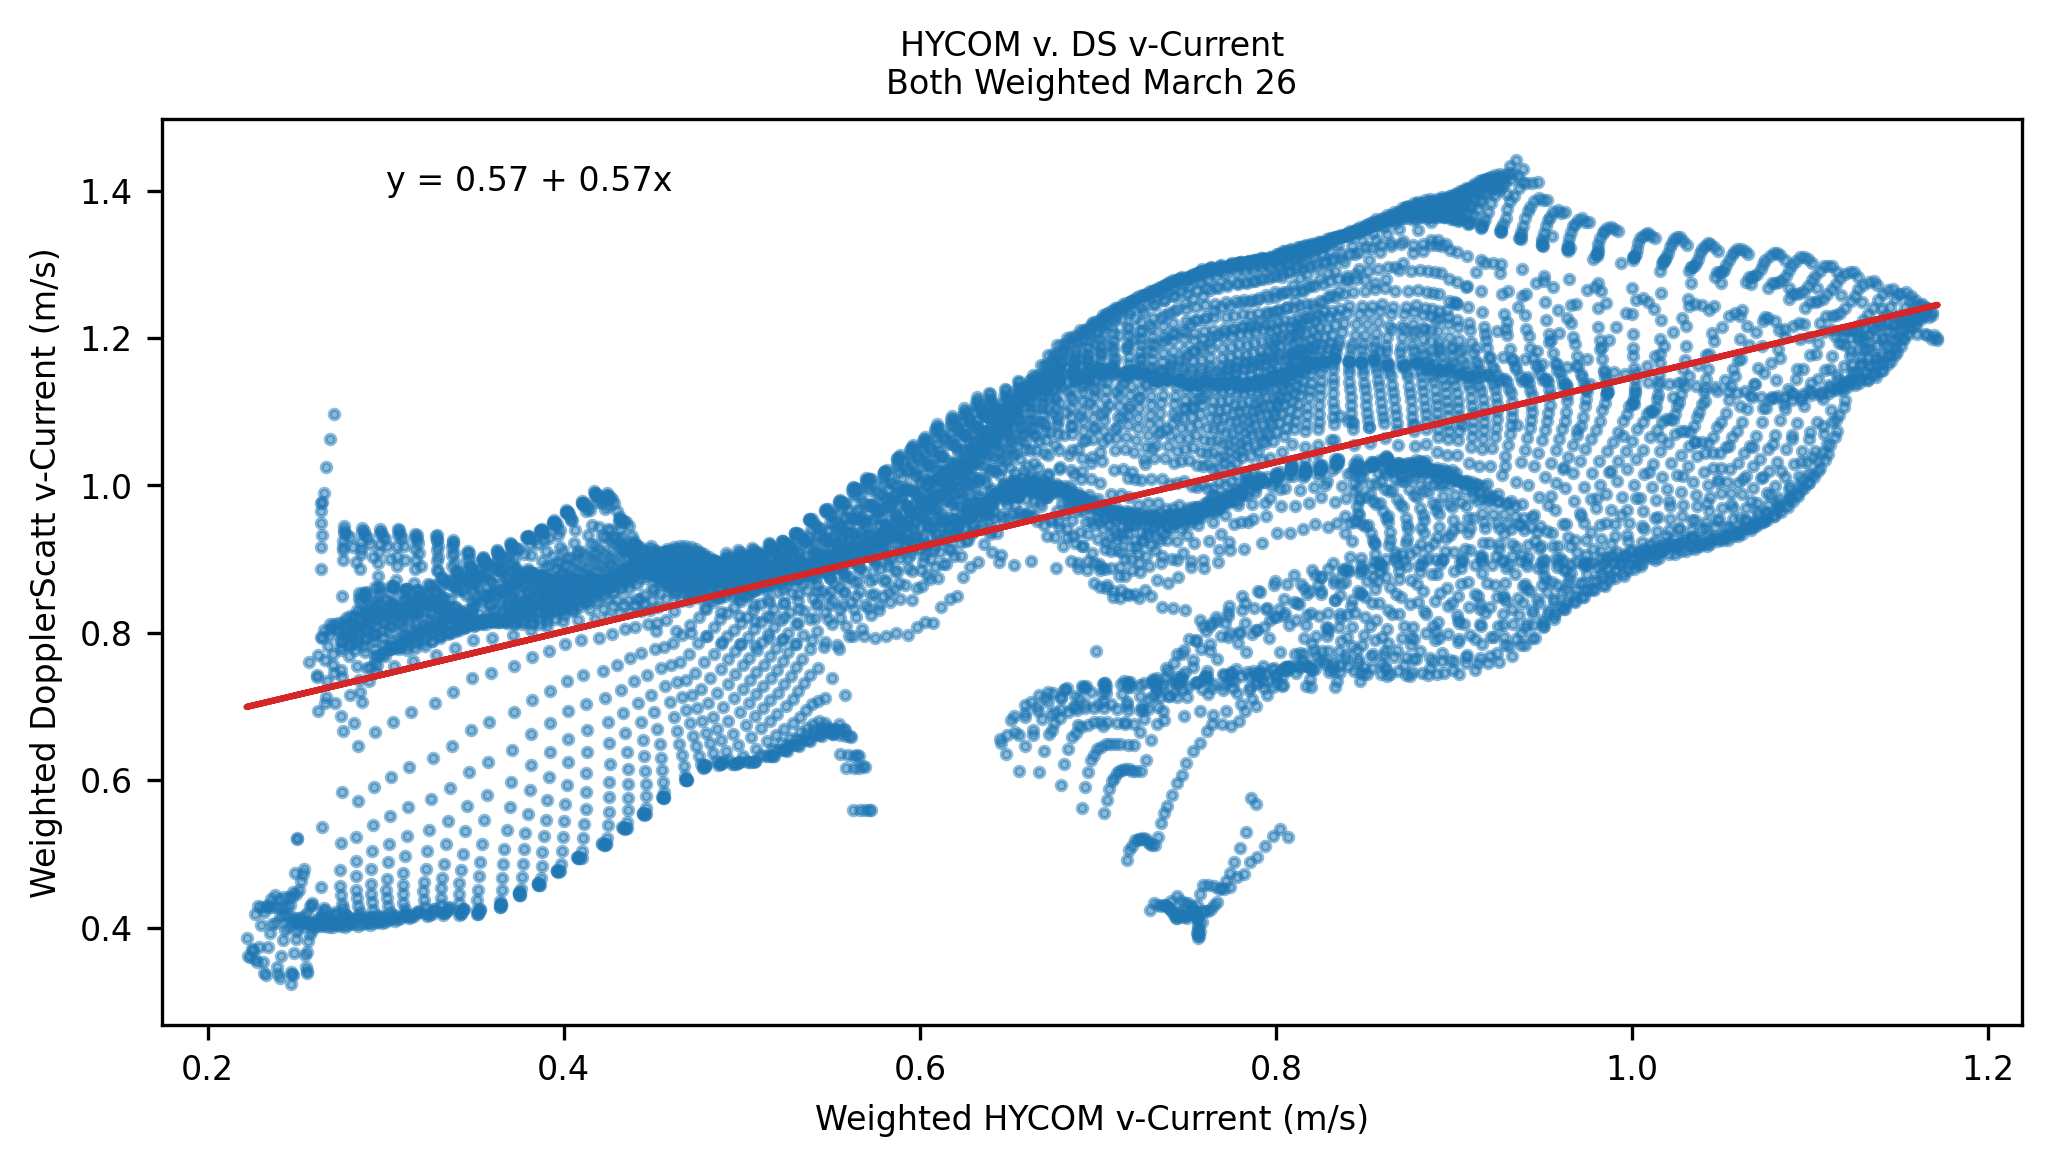

In [15]:
#Scatter for U HYCOM and U DS 

DS26V = DS_weightedV26.flatten() #y, noisier variable on y 
HYCOM26V = HYCOM_weightedV26.flatten() #x 

test_1 = np.where(DS26V!=-999)
test_2 = DS26V[test_1]
test_3 = HYCOM26V[test_1]

DS26V = test_2
HYCOM26V = test_3
a, b = np.polyfit(HYCOM26V, DS26V, 1)
#add line of best fit to plot
#plt.plot(x, a*x+b)
#add fitted regression equation to plot
#plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

SMALL_SIZE = 8
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)
figure(figsize=(8,4), dpi=300)
#alpha between 0 and 1, 0=transparent, 1=solid
plt.scatter(HYCOM26V, DS26V, color='tab:blue', alpha=0.50, s=5)

plt.plot(HYCOM26V, a*HYCOM26V+b, color = 'tab:red')
plt.text(0.3, 1.4, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=8)

plt.title('HYCOM v. DS v-Current\nBoth Weighted March 26')
plt.ylabel('Weighted DopplerScatt v-Current (m/s)')
plt.xlabel('Weighted HYCOM v-Current (m/s)')
save_results_to = '/Users/Anna/Desktop/MSMET/Thesis/Writing/Plots/'
plt.savefig(save_results_to + '26V_Scatter.png', bbox_inches = 'tight',dpi = 150)
plt.show()


In [ ]:
#NETCDF TEST

#OPEN FILE, CREATE NEW DATASET
try: ncfile.close()  # just to be safe, make sure dataset is not already open.
except: pass
ncfile = nc.Dataset('/Users/Anna/Desktop/MSMET/Thesis/new1.nc', mode='w',format='NETCDF4_CLASSIC') 
print(ncfile)

#CREATING DIMENSIONS
#lat_dim = ncfile.createDimension('lat', 73)     # latitude axis
#lon_dim = ncfile.createDimension('lon', 144)    # longitude axis
lat_dim = ncfile.createDimension('lat', 490)     # latitude axis
lon_dim = ncfile.createDimension('lon', 613)    # longitude axis
time_dim = ncfile.createDimension('time', None) # unlimited axis (can be appended to).
for dim in ncfile.dimensions.items():
    print(dim)

#CREATING ATTRIBUTES
#ncfile.title='My model data'
ncfile.title='WRF_out_test'
print(ncfile.title)

#ncfile.subtitle="My model data subtitle"
ncfile.subtitle="v26"
print(ncfile.subtitle)
print(ncfile)

#CREATING VARIABLES
# Define two variables with the same names as dimensions,
# a conventional way to define "coordinate variables".
lat = ncfile.createVariable('lat', np.float32, ('lat',))
lat.units = 'degrees_north'
lat.long_name = 'latitude'
lon = ncfile.createVariable('lon', np.float32, ('lon',))
lon.units = 'degrees_east'
lon.long_name = 'longitude'
time = ncfile.createVariable('time', np.float64, ('time',))
time.units = 'hours since 1800-01-01'
time.long_name = 'time'
# Define a 3D variable to hold the data
#temp = ncfile.createVariable('temp',np.float64,('time','lat','lon')) # note: unlimited dimension is leftmost
#temp.units = 'K' # degrees Kelvin
#temp.standard_name = 'air_temperature' # this is a CF standard name
#print(temp)
v_current = ncfile.createVariable('v_current',np.float64,('time','lat','lon')) # note: unlimited dimension is leftmost
v_current.units = 'm/s' # degrees Kelvin
v_current.standard_name = 'north-south current component' # this is a CF standard name
print(v_current)
v_current[:,:] =  v26_WRF
print('\nu_currents:', v26_WRF[:,:])
#PREDEFINED VARIABLES
#print("-- Some pre-defined attributes for variable temp:")
#print("temp.dimensions:", temp.dimensions)
#print("temp.shape:", temp.shape)
#print("temp.dtype:", temp.dtype)
#print("temp.ndim:", temp.ndim)
print("\n-- Some pre-defined attributes for variable v_current:")
print("v_current.dimensions:", v_current.dimensions)
print("v_current.shape:", v_current.shape)
print("v_current.dtype:", v_current.dtype)
print("v_current.ndim:", v_current.ndim)

#WRITING DATA
#nlats = len(lat_dim); nlons = len(lon_dim); ntimes = 3
# Write latitudes, longitudes.
# Note: the ":" is necessary in these "write" statements
#lat[:] = -90. + (180./nlats)*np.arange(nlats) # south pole to north pole
#lon[:] = (180./nlats)*np.arange(nlons) # Greenwich meridian eastward
# create a 3D array of random numbers
#data_arr = np.random.uniform(low=280,high=330,size=(ntimes,nlats,nlons))
# Write the data.  This writes the whole 3D netCDF variable all at once.
#temp[:,:,:] = data_arr  # Appends data along unlimited dimension
#print("-- Wrote data, temp.shape is now ", temp.shape)
# read data back from variable (by slicing it), print min and max
#print("-- Min/Max values:", temp[:,:,:].min(), temp[:,:,:].max())

#nlats = len(lat_dim); nlons = len(lon_dim); ntimes = 3
# Write latitudes, longitudes.
# Note: the ":" is necessary in these "write" statements
#lat[:] = -90. + (180./nlats)*np.arange(nlats) # south pole to north pole
#lon[:] = (180./nlats)*np.arange(nlons) # Greenwich meridian eastward
lat[:] = WRF_lat 
lon[:]= WRF_lon
print('\nlats:', lat[:])
print('lons;', lon[:])
# create a 3D array of random numbers
#data_arr = np.random.uniform(low=280,high=330,size=(ntimes,nlats,nlons))
# Write the data.  This writes the whole 3D netCDF variable all at once.
#u_current[:,:,:] = data_arr  # Appends data along unlimited dimension
#print("-- Wrote data, u_current.shape is now ", u_current.shape)
# read data back from variable (by slicing it), print min and max
#print("-- Min/Max values:", u_current[:,:,:].min(), u_current[:,:,:].max())
'''
# create a 2D array of random numbers
#data_slice = np.random.uniform(low=280,high=330,size=(nlats,nlons))
#temp[3,:,:] = data_slice   # Appends the 4th time slice
print("-- Wrote more data, u_current.shape is now ", u_current.shape)
# create a 2D array of random numbers
data_slice = np.random.uniform(low=280,high=330,size=(nlats,nlons))
u_current[3,:,:] = data_slice   # Appends the 4th time slice
print("-- Wrote more data, u_current.shape is now ", u_current.shape)
'''
print(time)
times_arr = time[:]
print(type(times_arr),times_arr)  # dashes indicate masked values (where data has not yet been written)

# 1st 4 days of October.
#dates = [dt.datetime(2014,10,1,0),dt.datetime(2014,10,2,0),dt.datetime(2014,10,3,0),dt.datetime(2014,10,4,0)]
#print(dates)
dates = [dt.datetime(2018,3,25,0)]
print(dates)
times = date2num(dates, time.units)
print(times, time.units) # numeric values
time[:] = times
# read time data back, convert to datetime instances, check values.
print(time[:])
print(time.units)
print(num2date(time[:],time.units))

#CLOSING NETCDF
# first print the Dataset object to see what we've got
print(ncfile)
# close the Dataset.
ncfile.close(); print('\nDataset is closed!')
